In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression

In [39]:
df = pd.read_csv("emails.csv")

In [40]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


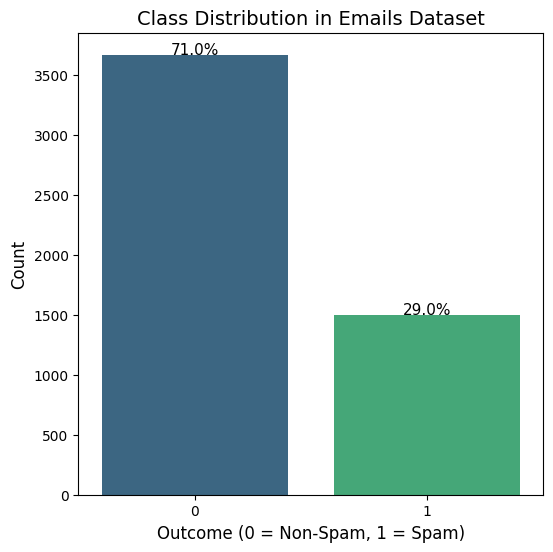

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='Prediction', data=df, palette='viridis', hue='Prediction', legend=False)

plt.title('Class Distribution in Emails Dataset', fontsize=14)
plt.xlabel('Outcome (0 = Non-Spam, 1 = Spam)', fontsize=12)
plt.ylabel('Count', fontsize=12)

total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.text(p.get_x() + p.get_width()/2, p.get_height() + 5, percentage,
             ha='center', fontsize=11)

plt.show()

In [50]:
X = df.drop(columns=['Prediction', 'Email No.'], axis=1)
y = df['Prediction']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

### Base Model

In [55]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Baseline Model (No Resampling) ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

=== Baseline Model (No Resampling) ===
[[1079   23]
 [  18  432]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1102
           1       0.95      0.96      0.95       450

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552

Accuracy: 0.9735824742268041


### Random Under Sampling

In [56]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model.fit(X_train_rus, y_train_rus)
y_pred_rus = model.predict(X_test)

print("\n=== Random Under Sampling ===")
print(confusion_matrix(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))
print("Accuracy:", accuracy_score(y_test, y_pred_rus))


=== Random Under Sampling ===
[[1030   72]
 [   1  449]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1102
           1       0.86      1.00      0.92       450

    accuracy                           0.95      1552
   macro avg       0.93      0.97      0.95      1552
weighted avg       0.96      0.95      0.95      1552

Accuracy: 0.9529639175257731


### Random Over Sampling

In [57]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model.fit(X_train_ros, y_train_ros)
y_pred_ros = model.predict(X_test)

print("\n=== Random Over Sampling ===")
print(confusion_matrix(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))
print("Accuracy:", accuracy_score(y_test, y_pred_ros))


=== Random Over Sampling ===
[[1066   36]
 [   7  443]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1102
           1       0.92      0.98      0.95       450

    accuracy                           0.97      1552
   macro avg       0.96      0.98      0.97      1552
weighted avg       0.97      0.97      0.97      1552

Accuracy: 0.9722938144329897


### SMOTE (Synthetic Minority Oversampling Technique)

In [58]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test)

print("\n=== SMOTE ===")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_smote))


=== SMOTE ===
[[1071   31]
 [  10  440]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1102
           1       0.93      0.98      0.96       450

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552

Accuracy: 0.9735824742268041
